In [1]:
#grid search
import numpy as np
import pandas as pd
data=pd.read_csv("../feature_extraction/yisijuji_liudiao_concat_data_without_normed.csv",dtype=object)
data=data.fillna('0.0')
data1=data.drop(['label'],axis=1)
data1=data1.drop(['Incident_GUID','num0','num2','false','false.1','false.2'],axis=1)
# col_list=data1.columns.values.tolist()
# print(col_list)
all_data=data1.values
label=data['label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, label, test_size=0.25, random_state=0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [2]:
print(y_test)

[0 1 0 ... 1 0 1]


In [2]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score 
# from sklearn import xgboost

from xgboost import XGBClassifier


KeyboardInterrupt: 

In [1]:
from xgboost import XGBClassifier
clf_xgboost = XGBClassifier(booster='gbtree',objective='binary:logistic',n_estimators=50,learning_rate=0.05,max_depth=4,max_delta_step=2)
clf_xgboost.fit(X_train,y_train)
from sklearn.metrics import  recall_score
y_predict=clf_xgboost.predict(X_test)
print(recall_score(y_test,y_predict))
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_predict)
print(f1)


ModuleNotFoundError: No module named 'xgboost'

In [3]:
y_train_predict=clf_xgboost.predict(X_train)
print(recall_score(y_train,y_train_predict))
print(f1_score(y_train,y_train_predict))

NameError: name 'clf_xgboost' is not defined

In [4]:
from sklearn.externals import joblib
joblib.dump(clf_xgboost, "FBDO.joblib.dat")

['FBDO.joblib.dat']

In [3]:
from sklearn import metrics
classification_report = metrics.classification_report(y_test, y_predict)
print(classification_report)
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print(confusion_matrix)


              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1244
           1       0.94      0.97      0.95      1198

    accuracy                           0.95      2442
   macro avg       0.95      0.95      0.95      2442
weighted avg       0.95      0.95      0.95      2442

[[1166   78]
 [  38 1160]]


In [2]:
col_list3=['Disease_FoodborneCount', 'ExPosure_EatNum', '急性胃肠炎', '感染性腹泻', '其他', '毒蘑菇中毒',
           '菜豆中毒', '肉毒中毒', '亚硝酸盐中毒', '横纹肌溶解综合征', '贝类毒素中毒', '外省', '外籍', '本区县',
           '本市其他区县', '本省其他市', '港澳台', '托幼儿童', '学生', '农民', '民工', '餐饮食品业', '医务人员',
           '干部职员', '离退人员', '教师', '家务及待业', '其他', '散居儿童', '工人', '商业服务', '牧民', '渔民',
           '不详', 'Disease_OtherIsill', '家庭', '餐饮服务业', '饭店（酒店）', '街头食品', '食品店', '餐饮业-其他', 
           '集体食堂', '单位食堂', '学校食堂', '工地食堂', '零售市场', '农贸市场', '超市', '零售店', '零售-其他', 
           '其他', '其他', '网店', 'nan', '家庭', '家庭', '餐饮服务业', '饭店（酒店）', '街头食品', '食品店', '餐饮业-其他',
           '集体食堂', '单位食堂', '学校食堂', '工地食堂', '零售市场', '农贸市场', '超市', '零售店', '零售-其他', '其他', 
           '其他', '农村宴席', '农村宴席', '学校', 'nan.1', 'ExPosure_IsBuyDomestic', 'ExPosure_IsEatDomestic','ExPosure_OtherIsill',
           '餐饮服务业', '家庭自制', '预包装', '散装（包括简易包装）', '其他', '肉与肉制品', '蔬菜类及其制品',
           '水果类及其制品（包括果脯和蜜饯）', '水产动物及其制品', '婴幼儿食品', '乳与乳制品', '蛋与蛋制品', '饮料与冷冻饮品类',
           '包装饮用水（含桶装水）', '粮食类及其制品（含淀粉糖类、焙烤类及各类主食）', '豆及豆制品', '坚果籽类及其制品', 
           '菌类及其制品', '酒类及其制品', '糖果、巧克力、蜂蜜及其制品', '藻类及其制品', '油脂类', '调味品', '其他食品',
           '多种食品', '混合食品', '不明食品', '发热', '面色潮红', '面色苍白', '发绀', '脱水', '口渴', '浮肿', '体重下降', 
           '寒战', '乏力', '贫血', '肿胀', '失眠', '口有糊味', '金属味', '肥皂/咸味', '唾液过多', '足/腕下垂', '色素沉着',
           '脱皮', '其他', '畏光', '恶心', '呕吐', '腹痛', '腹泻 性状', '便秘', '里急后重', '其他', '呼吸短促', '咯血', 
           '呼吸困难', '其他', '胸闷', '胸痛', '心悸', '气短', '其他', '尿量减少', '背部/肾区疼痛', '尿中带血', '其他', 
           '肾结石', '头痛', '眩晕', '昏迷', '抽搐', '惊厥', '瘫痪', '言语困难', '吞咽困难', '感觉异常', '精神失常', 
           '复视', '视力模糊', '肢体麻木', '末梢感觉障碍', '瞳孔异常', '针刺感', '其他', '瘙痒', '烧灼感', '皮疹',
           '其他', 'Disease_Address', 'Disease_Age', 'Disease_District', 'Disease_PatientUnit', 'Disease_SickTime', 
           'Disease_TreatTime', 'ExPose_BuyDistrict', 'ExPosure_BuyAddress', 'ExPosure_EatAddress', 'ExPosure_EatDistrict',
           'ExPosure_Eattime', 'ExPosure_Name']
col_list3_english=['Disease_FoodborneCount','ExPosure_EatNum','acute gastroenteritis','infectious diarrhea','other','poisonous mushroom poisoning',
           'bean poisoning','botulism poisoning','nitrite poisoning','rhabdomyolysis syndrome','shellfish poisoning','other provinces','foreigners','local districts',
           'other districts in the city','other cities in the province','Hong Kong, Macao and Taiwan','kindergarten children','students','farmers','migrant workers','catering and food industry','medical workers',
           'careers and staff','retired staff','teachers','housework and unemployed','others','scattered children','workers','commercial services','herders','fishermen',
           'unknown','Disease_OtherIsill','family','food service industry','restaurant (hotel)','street food','food store','restaurant industry-other',
           'collective canteen','unit canteen','school canteen','site canteen','retail market','farmer market','supermarket','retail store','retail-other',
           'other','other','online shop','nan','family','family','catering service industry','restaurant (hotel)','street food','food store','catering industry-other',
           'collective canteen','unit canteen','school canteen','site canteen','retail market','farmer market','supermarket','retail store','retail-other','other',
           'other','rural banquet','rural banquet','school','nan.1','ExPosure_IsBuyDomestic','ExPosure_IsEatDomestic','ExPosure_OtherIsill',
           'food service industry','home-made','pre-packaged','bulk and simple packaging','others','meat and meat products','vegetables and their products',
           'fruits and their products','Aquatic animals and their products','infant food','milk and dairy products','eggs and egg products','beverages and frozen drinks',
           'packaged drinking water','cereals and their products','beans and bean products','nut seeds and their products',
           'fungus and its products','alcohol and its products','candy, chocolate, honey and its products','algae and its products','oil and fats','condiments','other foods',
           'multiple foods','mixed foods','unidentified foods','fever','flushing','pale','cyanosis','dehydration','thirst','edema','weight loss ',
           'chill','weakness','anemia','swelling','insomnia','mushy mouth','metallic','soap/salty','excessive saliva','foot/wrist drop ', 'pigmentation',
           'peeling','other','phobia','nausea','vomiting','abdominal pain','diarrhea traits','constipation','tenesmus','others','shortness of breath','hemoptysis' ,
           'dyspnea','other','chest tightness','chest pain','palpitation','shortness of breath','other','reduced urine output','back/kidney area pain','blood in urine', 'other',
           'kidney stones','headache','vertigo','coma','convulsions','convulsions','paralysis','speech difficulties','dysphagia','paresthesias','mental disorders',
           'diplopia','blurred vision','extremity numbness','peripheral sensory disturbance','pupillary abnormality','pingling sensation','other','itching','burning sensation','rash',
           'other','Disease_Address','Disease_Age','Disease_District','Disease_PatientUnit','Disease_SickTime',
           'Disease_TreatTime','ExPose_BuyDistrict','ExPosure_BuyAddress','ExPosure_EatAddress','ExPosure_EatDistrict',
           'ExPosure_Eattime','ExPosure_Name']
importances = list(clf_xgboost.feature_importances_)  
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(col_list3_english, importances)] 
# print(type(feature_importances))
feature_importances = sorted(feature_importances, key =lambda x:x[1], reverse = True)
# print(feature_importances)
for pair in feature_importances:
    print('Variable: {}         Importance: {}'.format(*pair))

NameError: name 'clf_xgboost' is not defined

In [5]:
feature_importances_not_zero=[]
count=0
for item in feature_importances:
#     if item[1]>0.008:
    feature_importances_not_zero.append(item)
    count+=1
    if count==14:
        break
print(feature_importances_not_zero)
other_percent=1
for item in feature_importances_not_zero:
    other_percent-=item[1]
feature_importances_not_zero.append(('Other Features',other_percent))
print(feature_importances_not_zero)

[('ExPosure_OtherIsill', 0.65), ('ExPosure_EatDistrict', 0.023), ('ExPosure_Eattime', 0.013), ('home-made', 0.012), ('food service industry', 0.011), ('ExPosure_EatNum', 0.01), ('acute gastroenteritis', 0.01), ('farmers', 0.01), ('meat and meat products', 0.01), ('Disease_SickTime', 0.01), ('ExPosure_EatAddress', 0.01), ('Disease_Address', 0.009), ('ExPosure_BuyAddress', 0.009), ('ExPosure_Name', 0.008)]
[('ExPosure_OtherIsill', 0.65), ('ExPosure_EatDistrict', 0.023), ('ExPosure_Eattime', 0.013), ('home-made', 0.012), ('food service industry', 0.011), ('ExPosure_EatNum', 0.01), ('acute gastroenteritis', 0.01), ('farmers', 0.01), ('meat and meat products', 0.01), ('Disease_SickTime', 0.01), ('ExPosure_EatAddress', 0.01), ('Disease_Address', 0.009), ('ExPosure_BuyAddress', 0.009), ('ExPosure_Name', 0.008), ('Other Features', 0.20500002522021532)]


In [6]:
feature_importances_not_zero=[('ExPosure_OtherIsill', 0.65),('Other Features', 0.20500002522021532), ('ExPosure_EatDistrict', 0.023), ('ExPosure_Eattime', 0.013), ('home-made', 0.012), ('food service industry', 0.011), ('ExPosure_EatNum', 0.01), ('acute gastroenteritis', 0.01), ('farmers', 0.01), ('meat and meat products', 0.01), ('Disease_SickTime', 0.01), ('ExPosure_EatAddress', 0.01), ('Disease_Address', 0.009), ('ExPosure_BuyAddress', 0.009), ('ExPosure_Name', 0.008)]
feature_importances_not_zero.reverse()

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
Y =[item[0] for item in feature_importances_not_zero]
X =[item[1] for item in feature_importances_not_zero]
# 绘制条形图
plt.figure(figsize=(20,10)) 
plt.barh(range(len(Y)), # 指定条形图y轴的刻度值
        X, # 指定条形图x轴的数值
        tick_label = Y, # 指定条形图y轴的刻度标签
        color = 'steelblue', # 指定条形图的填充色
       )

# print(Impt_Series.values)
# print()
for y,x in enumerate(X):
    plt.text(x+0.0002,y,'%s' %round(x,3),va='center')
plt.ylabel('Features')
plt.xlabel('Importances')
plt.savefig('feature_importances/xgboost_with_other_isill_11_2.png',dpi=500)
plt.show()

In E:\Anaconda\envs\tfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda\envs\tfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda\envs\tfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In E:\Anaconda\envs\tfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda\envs\tfenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
Th

<Figure size 2000x1000 with 1 Axes>

In [7]:
print(clf_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=2, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


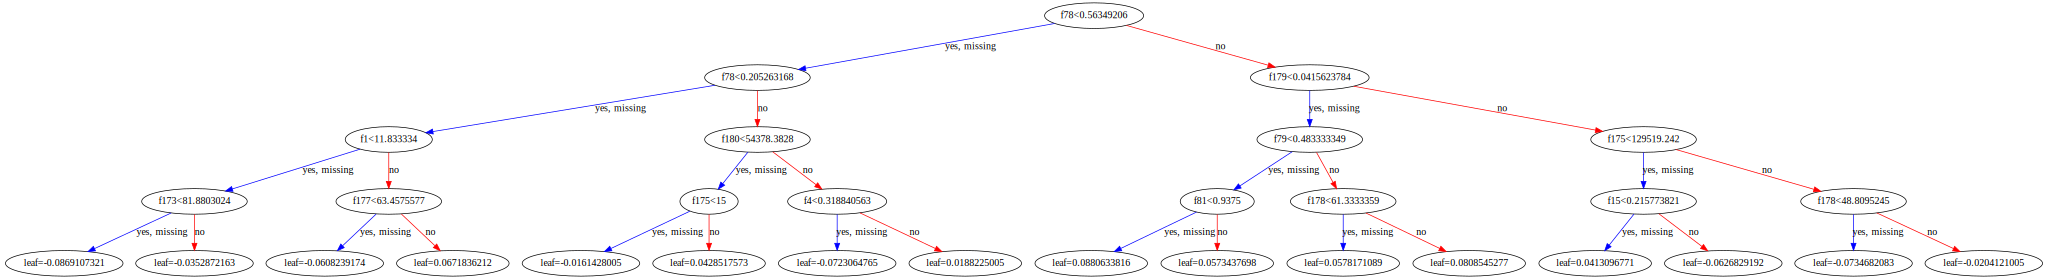

In [20]:
import xgboost
import graphviz
import matplotlib.pyplot as plt
xgboost.to_graphviz(clf_xgboost,num_trees=2)

In [34]:
fig.savefig('xgb_tree_1.png')

In [1]:
#XGBoost输出概率
import numpy as np
import pandas as pd
data=pd.read_csv("../feature_extraction/yisijuji_liudiao_concat_data_without_normed.csv",dtype=object)
data=data.fillna('0.0')
data1=data.drop(['label'],axis=1)
data1=data1.drop(['Incident_GUID','num0','num2','false','false.1','false.2'],axis=1)
# col_list=data1.columns.values.tolist()
# print(col_list)
all_data=data1.values
label=data['label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, label, test_size=0.25, random_state=0)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [2]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score 
# from sklearn import xgboost

from xgboost import XGBClassifier
clf_xgboost = XGBClassifier(booster='gbtree',objective='binary:logistic',n_estimators=50,learning_rate=0.05,max_depth=4,max_delta_step=2)
clf_xgboost.fit(X_train,y_train)
# from sklearn.metrics import  recall_score
# y_predict=clf_xgboost.predict(X_test)
# print(recall_score(y_test,y_predict))
# from sklearn.metrics import f1_score
# f1=f1_score(y_test,y_predict)
# print(f1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=2, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [4]:
y_predict_prob=clf_xgboost.predict_proba(X_test)
print(y_predict_prob)

[[0.8906368  0.10936319]
 [0.17253017 0.8274698 ]
 [0.95061857 0.04938146]
 ...
 [0.05673313 0.94326687]
 [0.9276071  0.07239289]
 [0.08697361 0.9130264 ]]
